# Quickstart

## 0. Installation

Look at the [README](https://github.com/kausable/CausalDynamics/blob/main/README.md) for installation instructions.

## 1. Generate data
### 1.1 Simple causal models

Let's first look at how to generate data for single dynamical systems. For this, we look at a Lorenz system and solve it for 1000 time steps. Under the hood, the ODE systems are integrated using the [`dysts`](https://github.com/williamgilpin/dysts) package.

Let's generate the data and visualize the trajectory.

(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,)

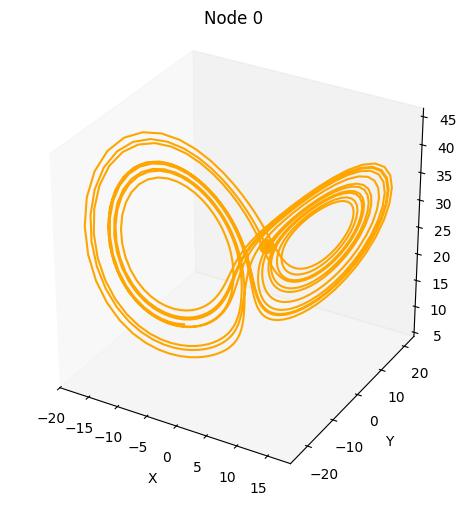

In [14]:
import xarray as xr
from causaldynamics.systems import solve_system
from causaldynamics.plot import plot_3d_trajectories

data = solve_system(num_timesteps=1000, num_systems=1, system_name='Lorenz')
data = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(data)

We call the system dimension `node` for consistency because these systems will later be the driver root nodes in the SCMs. 

You can also solve a randomly selected system, pass `kwargs` to `dysts` underlying `make_trajectory` function, or solve multiple dynamical systems in parallel.

For more information, please checkout the more detailed introduction of [simple causal models](https://kausable.github.io/CausalDynamics/notebooks/simple_causal_models.html).

### 1.1 Coupled causal models

Let's look at how to generate data for the coupled causal models case and visualize it.

This code will first create a structural causal model. The `create_scm` function returns the adjacency matrix `A` of the SCM, the weights `W` and biases `b` of all the MLPs located on the nodes and the `root_nodes` that act as temporal system driving functions.

We use this SCM to simulate a system consisting of `num_nodes` for `num_timesteps` and driven by the dynamical systems `system_name` that are located on the root nodes.

You can get an intuitive understanding of how signals are processed through the edges of the SCM if you take a look at the generated images below. Here, the driving signal from root node 1 is linearly transformed through the MLP on the edge resulting in the signal on node 0.

INFO - Creating SCM with 2 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...


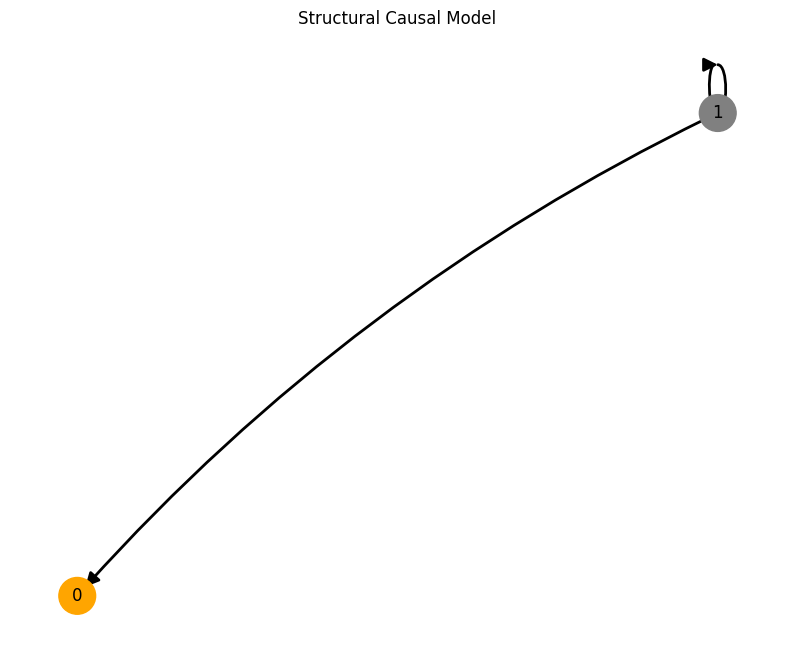

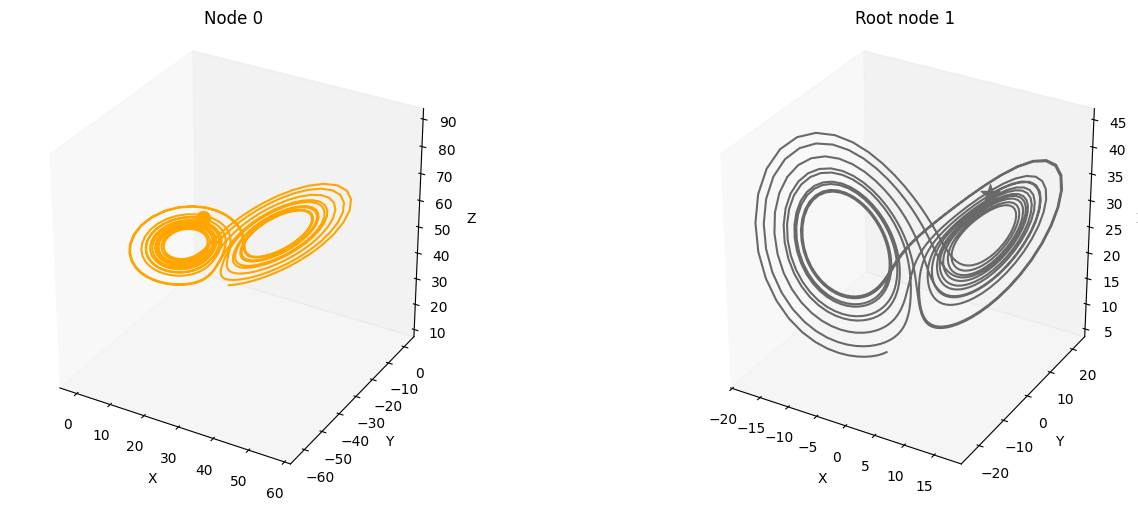

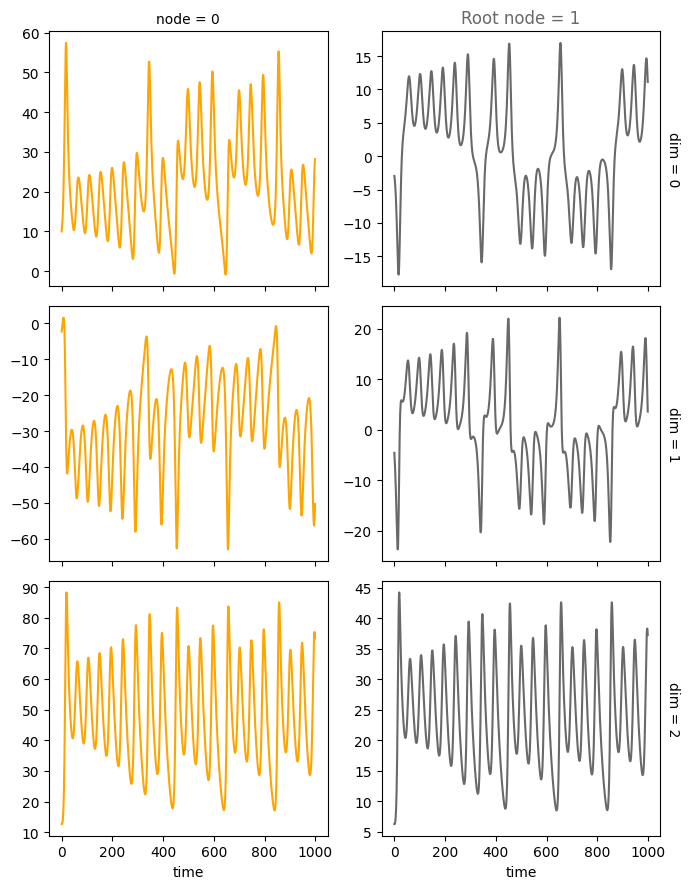

In [15]:
from causaldynamics.scm import create_scm_graph
from causaldynamics.creator import create_scm, simulate_system
from causaldynamics.plot import plot_scm, plot_trajectories, plot_3d_trajectories

# Define parameters
num_nodes = 2
node_dim = 3
num_timesteps = 1000

system_name='Lorenz'
confounders = False

# Create the coupled structural causal model
A, W, b, root_nodes, _ = create_scm(num_nodes, node_dim, confounders=confounders)

# Simulate the system
data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name) 

# Visualize the SCM and the system
plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_3d_trajectories(data, root_nodes)
plot_trajectories(data, root_nodes=root_nodes, sharey=False)

We provide several features that can be conveniently accessed through the `create_scm` and `simulate_system` functions:

INFO - Creating SCM with 5 nodes and 3 dimensions each...
INFO - Simulating random system for 500 timesteps...


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 3'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 4'}, xlabel='X', ylabel='Y', zlabel='Z'>)

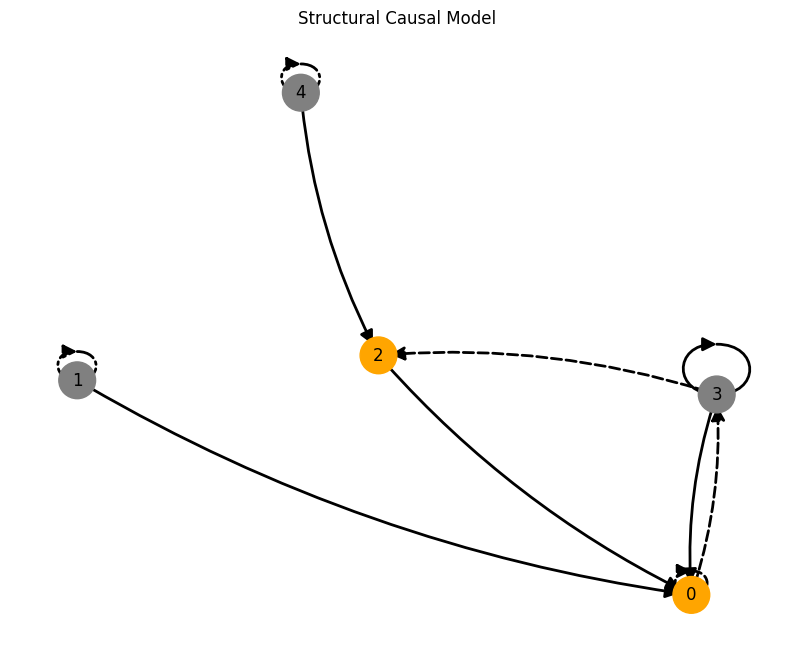

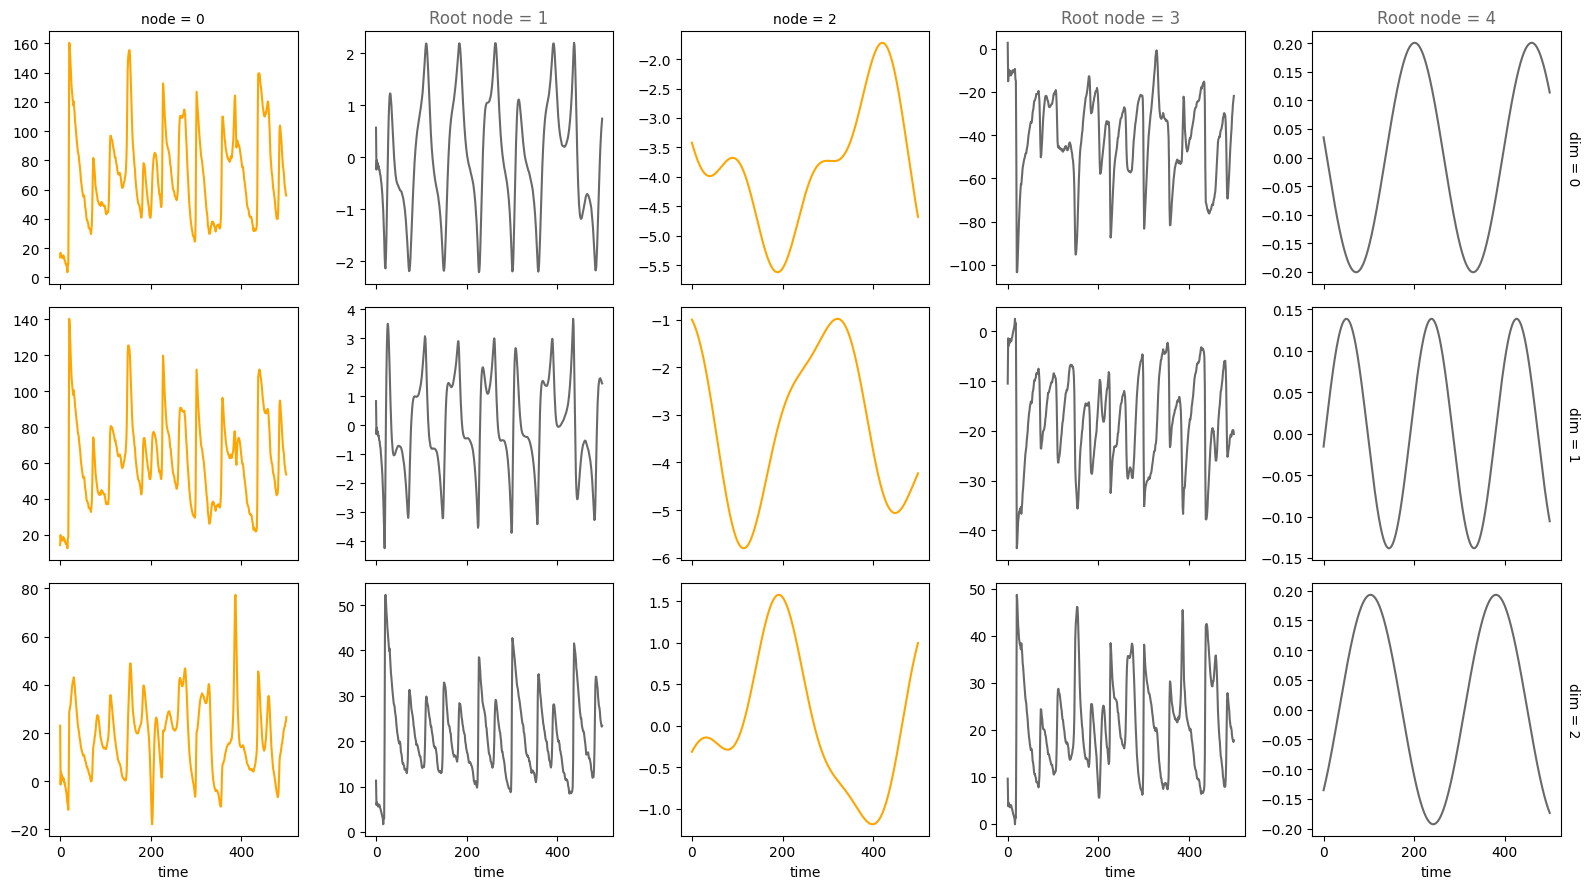

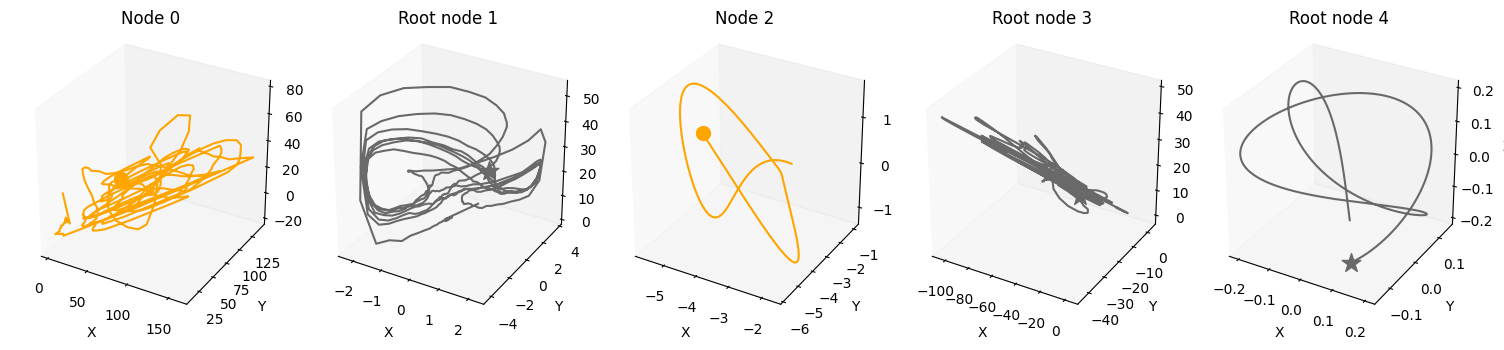

In [17]:
from causaldynamics.creator import create_scm, simulate_system
from causaldynamics.plot import plot_scm, plot_trajectories, plot_3d_trajectories

num_nodes = 5
node_dim = 3
num_timesteps = 500

confounders = False    # set to True to add scale-free confounders
standardize = False    # set to True to standardize the data
init_ratios = [1, 1]   # set ratios of dynamical systems and periodic drivers at root nodes. Here: equal ratio.
system_name='random'   # sample random dynamical system for the root nodes
noise = 0.5            # set noise for the dynamical systems

time_lag = 10                   # set time lag for time-lagged edges
time_lag_edge_probability = 0.1 # set probability of time-lagged edges


A, W, b, root_nodes, _ = create_scm(num_nodes, 
                                    node_dim,
                                    confounders=confounders,
                                    time_lag=time_lag,
                                    time_lag_edge_probability=time_lag_edge_probability)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name,
                      init_ratios=init_ratios,
                      time_lag=time_lag,
                      standardize=standardize,
                      make_trajectory_kwargs={'noise': noise}) 

plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes=root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

For an overview of the features, have a look at the [features](https://github.com/kausable/CausalDynamics/blob/main/notebooks/features.ipynb) and the [coupled causal models notebook](https://github.com/kausable/CausalDynamics/blob/main/notebooks/coupled_causal_models.ipynb). If you want more information on specific features, look at their respective notebook, e.g., [driver](https://github.com/kausable/CausalDynamics/blob/main/notebooks/driver.ipynb), [time_lag](https://github.com/kausable/CausalDynamics/blob/main/notebooks/time_lag.ipynb) or [standardization](https://github.com/kausable/CausalDynamics/blob/main/notebooks/standardization.ipynb).

## 2. Scripts
We provide several ready to use scripts to generate benchmark data for the simple, coupled, and climate scenario respectively. Have a look at the scripts [README](https://github.com/kausable/CausalDynamics/blob/main/scripts/README.md) 